In [1]:
import freud
import gsd.fl
import gsd.hoomd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_starting_frame(trajectory):
    '''
    Finds which index of the trajectory has the same dims as the last frame.
    Used to prevent RDF plots at different densities.
    '''
    box_dims = trajectory[-1].configuration.box[:3] # Final box dims
    for i in range(0, len(trajectory)):
        if np.array_equal(trajectory[i].configuration.box[:3], box_dims):
            starting_index = i
            break
    return(starting_index)

def compare_frames(file, frames, labels, r_max=8, dr=0.25):
    gsd_file = gsd.fl.GSDFile(file, "rb")
    trajectory = gsd.hoomd.HOOMDTrajectory(gsd_file)
    fig = plt.figure()
    for index, group in enumerate(frames):
        x, y, z = trajectory[-1].configuration.box[:3]
        system_box = freud.box.Box(x, y, z)
        rdf = freud.density.RDF(r_max, dr)
        for frame_num in group:
            frame = trajectory[frame_num]
            rdf = single_frame_rdf(frame=frame, rdf=rdf, box=system_box)
        x_data = rdf.R
        y_data = rdf.RDF
        plt.plot(x_data, y_data, label=labels[index])
    
    plt.title('RDF: Hot Temp and Cold Temp (Constant Density)')
    plt.ylabel('g(r)')
    plt.legend()
    plt.show()
    
        
def plot_rdf(files, labels, num_frames=1, r_max=8, dr=0.25):
    
    fig = plt.figure()
    for i, f in enumerate(files):
        rdf, x, y = average_rdf(f, num_frames, r_max, dr)
        plt.plot(x, y, label = labels[i])
    
    plt.show()

def average_rdf(file, num_frames=1, r_max=8, dr=0.25):
    
    gsd_file = gsd.fl.GSDFile(file, "rb")
    trajectory = gsd.hoomd.HOOMDTrajectory(gsd_file)
    starting_frame = find_starting_frame(trajectory) # First frame at final box dims
    print("STARTING FRAME = {}".format(starting_frame))
    if num_frames > len(trajectory) - starting_frame:
        print('Using this many frames will result in multiple box sizes being used')
        return
    x, y, z = trajectory[-1].configuration.box[:3]
    if r_max == None:
        if x == y and x == z:
            r_max = x // 2
        else:
            r_max = 8
    system_box = freud.box.Box(x, y, z)
    rdf = freud.density.RDF(r_max, dr)
    for i in range(1, num_frames + 1):
        frame = trajectory[-i]
        rdf = single_frame_rdf(frame=frame, rdf=rdf, box=system_box)
    x_data = rdf.R
    y_data = rdf.RDF
    return rdf, x_data, y_data
    
def single_frame_rdf(frame, rdf, box):
    
    positions = frame.particles.position
    rdf.accumulate(box=box, ref_points = positions)
    return rdf

Temperature and Potential Energy:
Data cutoff at 600 data points for visualization purposes
Actually have around 10,000 data points


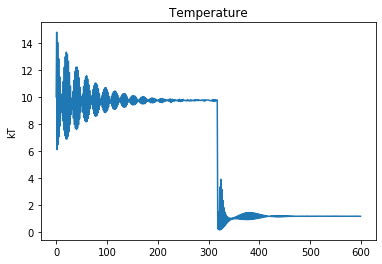

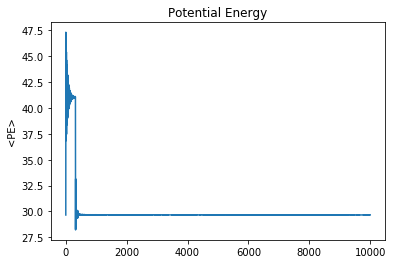

RDF of the system during the kT = 10 frames (3 frames) plus the first 3 frames after kT changed to 1.2:

Medium Size System:


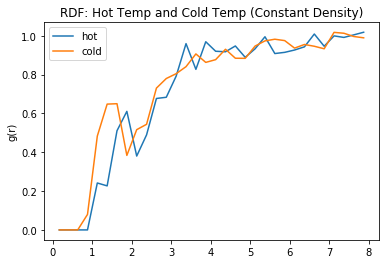

Medium Size System:


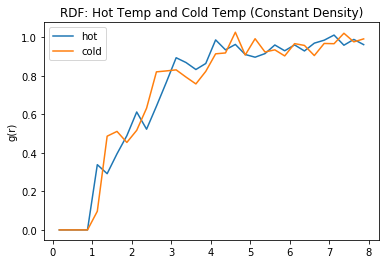

Small Size System:


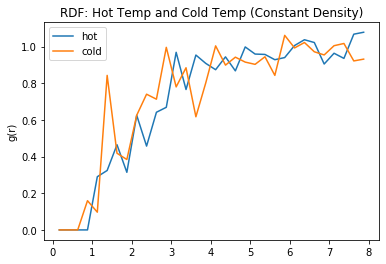

Also plotting the last 3 frames of the system:


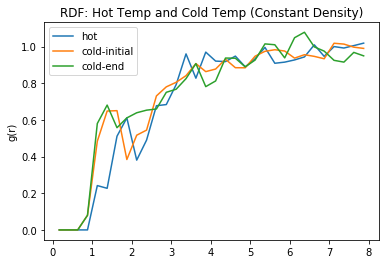

In [3]:
print('Temperature and Potential Energy:')
print('Data cutoff at 600 data points for visualization purposes')
print('Actually have around 10,000 data points')
data_file = np.genfromtxt(fname = "data/med-5mer-traj.log", delimiter = '	', names=True)
temp = data_file['temperature']
plt.plot(temp[:600])
plt.title('Temperature')
plt.ylabel('kT')
plt.show()
pe = data_file['potential_energy']
plt.plot(pe / 100000)
plt.title('Potential Energy')
plt.ylabel('<PE>')
plt.show()

print('RDF of the system during the kT = 10 frames (3 frames) plus the first 3 frames after kT changed to 1.2:')
print()
print('Medium Size System:')
compare_frames(file='data/med-5mer-centers.gsd', frames=[[1,2,3], [5,6,7]], labels=['hot', 'cold'])
print('Medium Size System:')
compare_frames(file='data/med-5mer-centers2.gsd', frames=[[1,2,3], [5,6,7]], labels=['hot', 'cold'])
print('Small Size System:')
compare_frames(file='data/small-5mer-centers.gsd', frames=[[1,2,3], [5,6,7]], labels=['hot', 'cold'])
print('Also plotting the last 3 frames of the system:')
compare_frames(file='data/med-5mer-centers.gsd', frames=[[1,2,3], [5,6,7], [-3, -2, -1]],
               labels=['hot', 'cold-initial', 'cold-end'])

In [4]:
#Focus time on detailed structure analysis --> Diff between annealing vs quenching
#Sq with different selections
    # Scattering patterns of all of these with whole morphology
    # Same ^ with certain selections (back-bones only, side-chains only, electron withdrawing groups)
    # Look for evidence of periodicity and correlations
    # What periodicities evolve if any --> How does that vary with temp and procesisng
    # 
#RDF with different selections